# Projeto 1 - Redes Complexas
### João Pedro Ramos Belmiro (9791198) e Matheus Aparecido do Carmo Alves (9791114)

## Exercício 1
### Criar algoritmos para calcular as medidas do grafo especificado neste exercício.

O primeiro passo para a realização deste exercício é inicializar o grafo especificado. 
Após sua inicialização, será apresentado o grafo criado de maneira gráfica visando facilitar a análise da rede em questão.

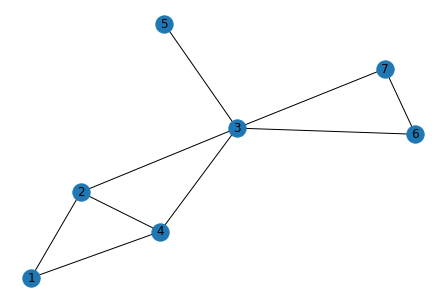

In [2]:
import networkx as nx 
import matplotlib.pyplot as plt

#creating empty graph
G = nx.Graph()

#Creating graph nodes from ex1
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(1, 4)
G.add_edge(2, 4)
G.add_edge(3, 4)
G.add_edge(3, 5)
G.add_edge(3, 6)
G.add_edge(3, 7)
G.add_edge(6, 7)

#drawing
nx.draw(G, with_labels=True)
plt.show(True)

### a) Distribuição de Graus

Com a rede criada, podemos realizar o cálculo das distribuições de probabilidade dos graus de cada nó nesta rede.
Para esta análise, um histograma é usado na visualização (apresentando a probabilidade de ocorrência de cada grau) seguindo:

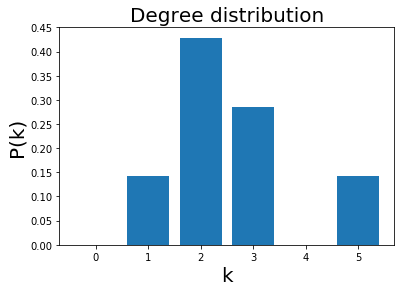

In [3]:
import numpy as np

#this function calculate the probability of each degree
#and also return a list with the possible values of degree
#for iteration
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= range(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

#ploting a histogram of the degree distribution
def hist_degree_dist(G):
    kv, P_k = degree_distribution(G)
    plt.bar(kv,P_k)
    plt.xlabel("k", fontsize=20)
    plt.ylabel("P(k)", fontsize=20)
    plt.title("Degree distribution", fontsize=20)
    #plt.grid(True)
    plt.show(True)
    
hist_degree_dist(G)

Dos cálculos, obtemos os resultados apresentados em forma de tabela por:

In [4]:
import pandas as pd

#showing results in a table
kv, P_k = degree_distribution(G)
pd.DataFrame({'P_k': P_k})


,P_k
0,0.000000
1,0.142857
2,0.428571
3,0.285714
4,0.000000
5,0.142857


### b) Coeficiente de Agrupamento Local

De forma semelhante, é possível se realizar uma análise do coefiente local de clustering de cada nó. Esta análise pode ser feita seguindo o código abaixo. Executando o algoritmo temos:

In [5]:
def local_clust(G):
    vcc = []
    for i in G.nodes():
        vcc.append(nx.clustering(G, i))

    vcc= np.array(vcc)
    return vcc
    
vcc = local_clust(G)
C_l = pd.DataFrame({'C_i': vcc})
C_l.index = G.nodes()
display(C_l)

,C_i
1,1.000000
2,0.666667
3,0.200000
4,0.666667
5,0.000000
6,1.000000
7,1.000000


Com essa informação extraída, temos que a média de cada $C_i$ para obtermos o coeficiente local de clustering.
Esse coeficiente permite uma análise da transitividade (i.e., grau de conectividade) local média dos nós que compõe nossa rede.

In [6]:
avc = np.average(vcc)
print("Average clustering = %3.4f" % avc)

Average clustering = 0.6476


### c) Transitividade

Agora, tem-se o interesse de se calcular o coeficiente global de clustering, buscando entender o quão "transitiva" é nossa rede (em escala global).

In [7]:
def global_clust(G):
    CC = (nx.transitivity(G)) 
    return CC

CC = global_clust(G)
print("transitivity = %3.4f" % CC)

transitivity = 0.4737


### d) Matriz de distancias

Outra análise interessante para análise de uma rede são das distâncias minimas (menores caminhos) de nó a nó.
Essa análise é proposta para resolução utilizando o algoritmo abaixo.
O resultado é organizado em uma matriz de distancias apresentada ao final.

In [8]:
def dist_matrix(G):
    N = G.number_of_nodes()
    nodes = list(G.nodes())
    if nx.is_connected(G) == True:
        D = np.zeros(shape=(N,N), dtype=int) # D is the matrix of distances
        for (i, nodei) in zip(range(N), nodes):
            for (j, nodej) in zip(range(i+1, N), nodes[nodes.index(nodei) + 1: N]):
                if(nodei != nodej):
                    aux = nx.shortest_path(G,nodei,nodej)
                    dij = int(len(aux)-1)
                    D[i][j] = dij
                    D[j][i] = dij

        return D
    else:
        print("The gridaph has more than one connected component")
        
D = dist_matrix(G)
print("Distace Matrix :")
D_disp = pd.DataFrame(D)
D_disp.columns = D_disp.index = G.nodes()
display(D_disp)

Distace Matrix :


,1,2,3,4,5,6,7
1,0,1,2,1,3,3,3
2,1,0,1,1,2,2,2
3,2,1,0,1,1,1,1
4,1,1,1,0,2,2,2
5,3,2,1,2,0,2,2
6,3,2,1,2,2,0,1
7,3,2,1,2,2,1,0


### e) Entropia da Distribuição de Graus

Após todas essas análises, iremos iniciar um estudo sobre a entrobia da distribuição de graus na rede. 
Assim, será calculado a distribuição de entropia da rede.
Essa análise será importante pois definirá uma métrica de complexidade da rede.
A entropia é calculada pela Entropia de Shannon.

In [9]:
import math

def shannon_entropy(G):
    kv,P_k = degree_distribution(G)
    H = 0
    for p in P_k:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

H = shannon_entropy (G)
print("entropy = %3.4f" % H)

entropy = 1.8424


### f) Momento de Segunda Ordem da Distribuição de Graus

Uma outra maneira de se habilitar um estudo sobre a complexidade associada a rede criada é pelo calculo do momento de segunda ordem da distribuição de graus da rede $<k^2>$.
Realizando este calculo para a rede encontramos:

In [10]:
def momment_of_degree_distribution(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

k2 = momment_of_degree_distribution(G,2)
print("<k^2> = %3.4f" % k2)

<k^2> = 8.0000


## Exercício 2:
### Análise de um grafo ponderado e não ponderado

Este exercício será baseado sobre (i) a rede que representa a relação de personagens de <i>"LesMiserables"</i> como um grafo direcional, e; (ii) a rede que representa o Ecossistema Aquífero da Flórida.

Primeiramente, será recuperado os dados do grafo (i) e ele será desenhado com arestas proporcionais ao seu peso. Seguindo o código abaixo, temos:

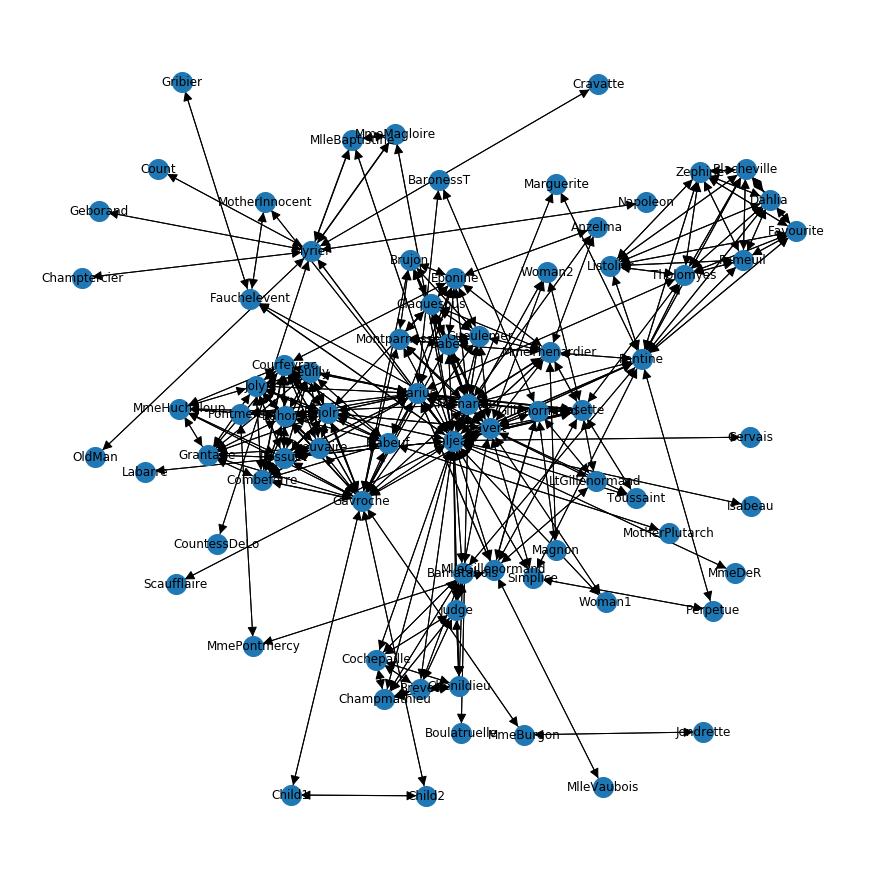

In [11]:
#reading les miserables network
LesMisNet = nx.read_gml('Networks/lesmis.gml')
LesMisNet = nx.to_directed(LesMisNet)

#listing all weights than normalizing them with 
#min-max normalization for better visualization
def min_max_1to2_norm(list):
    minimal = min(list)
    maximal = max(list)
    list = [((x - minimal) / (maximal - minimal)) + 1 for x in list]
    return list

edge_weights=[d['value'] for u,v,d in LesMisNet.edges(data=True)]
edge_weights = min_max_1to2_norm(edge_weights)

#drawing in a big picture for better visualization
plt.figure(1,figsize=(12,12))
pos=nx.spring_layout(LesMisNet, k =0.6)
nx.draw(LesMisNet,pos, node_size=400,arrowsize=20, width= edge_weights, with_labels=True)
plt.show(True)

Aplicando a mesma ideia para a rede (ii), obtemos o seguinte grafo:

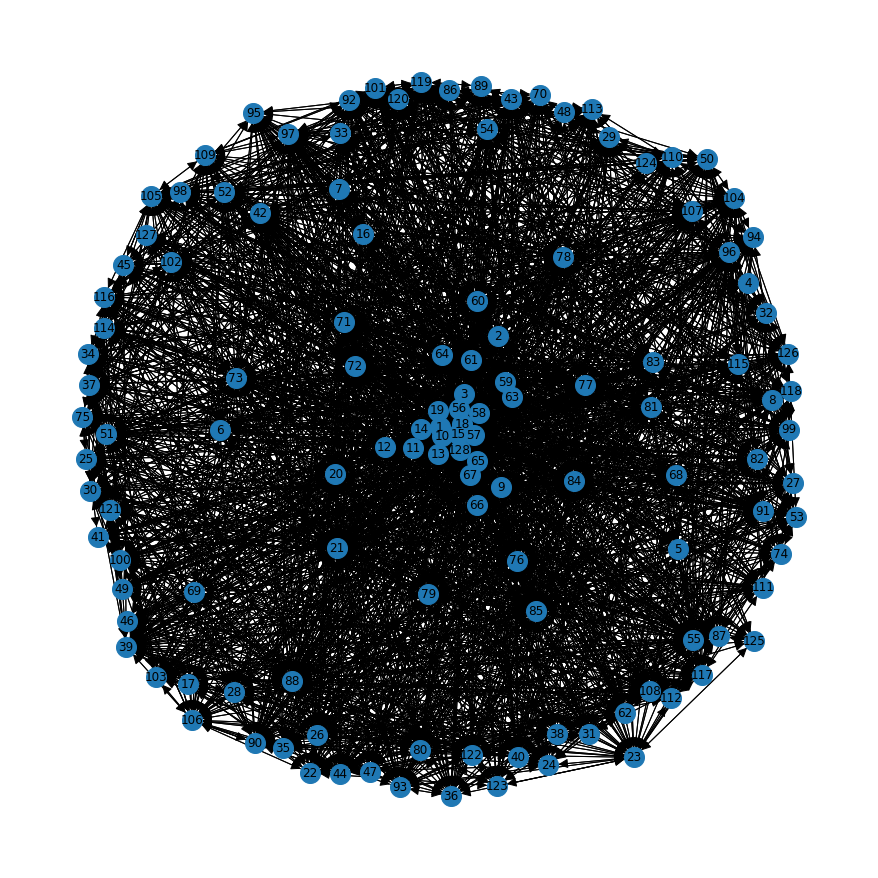

In [12]:
#reading Florida ecosystem wet network
FEW = nx.read_weighted_edgelist('Networks/eco-foodweb-baywet.edges', comments='%')
FEW = nx.to_directed(FEW)

#listing all weights than normalizing them with 
#min-max normalization for better visualization
def min_max_1to2_norm(list):
    minimal = min(list)
    maximal = max(list)
    list = [((x - minimal) / (maximal - minimal)) + 1 for x in list]
    return list

edge_weights=[d['weight'] for u,v,d in FEW.edges(data=True)]
edge_weights = min_max_1to2_norm(edge_weights)

#drawing in a big picture for better visualization
plt.figure(1,figsize=(12,12))
pos=nx.spring_layout(FEW, k =0.6)
nx.draw(FEW,pos, node_size=400,arrowsize=20, width=edge_weights, with_labels=True)
plt.show(True)


## a) Transformação para grafos não-direcionados e não-poderados

Agora, propõe-se a transformação desse grafos lidos (direcionados e ponderados) em grafos não-direcionados e não-ponderados.
Aplicando a ideia exposta pelo código abaixo, conseguimos transformar ambas as redes.

O resultado obtido para a rede (i) é:

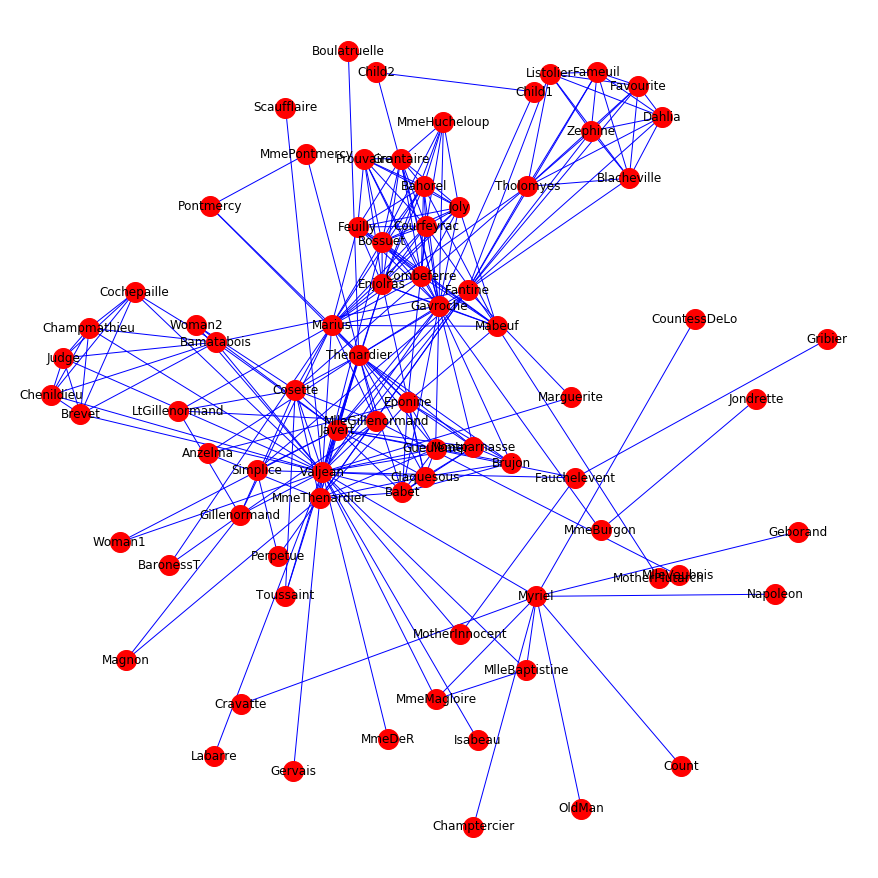

In [13]:
UW_UD_LesMisNet = nx.to_undirected(LesMisNet)

def to_unweight(G, min_weight, weight_label):
    Gnew = nx.Graph()
    for (u,v,w) in G.edges(data=True):
        if w[weight_label] >= min_weight :
            Gnew.add_edge(u, v)
    return Gnew
#unweight with threshold of 1.0 to include all edges
UW_UD_LesMisNet = to_unweight(UW_UD_LesMisNet, 1.0, 'value')

            
#drawing in a big picture for better visualization
plt.figure(1,figsize=(12,12))
pos=nx.spring_layout(UW_UD_LesMisNet, k =0.6)
nx.draw(UW_UD_LesMisNet,pos, node_size=400, width=1, with_labels=True, node_color = 'r', edge_color = 'b')
plt.show(True)

Agora, para a rede (ii) temos:

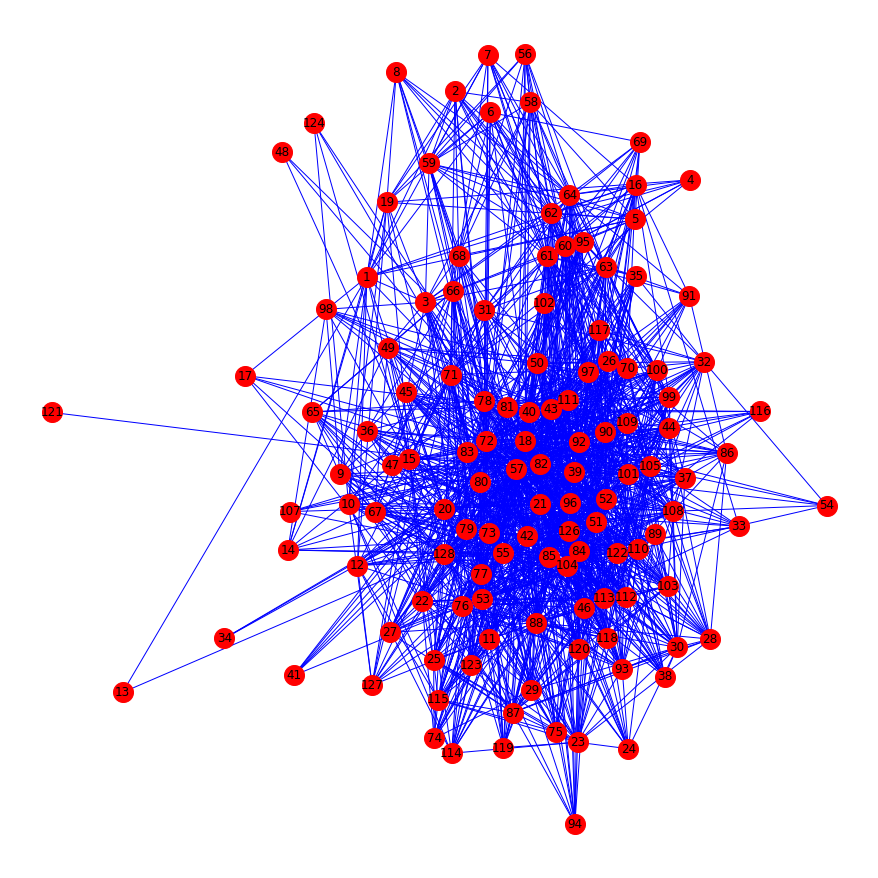

In [14]:
UW_UD_FEW = nx.to_undirected(FEW)

edges_weight = [w['weight'] for (u,v,w) in UW_UD_FEW.edges(data=True)]

q1 = (np.percentile(edges_weight, 25))
#unweight with threshold of q1 of all weights
UW_UD_FEW = to_unweight(UW_UD_FEW, q1, 'weight')

            
#drawing in a big picture for better visualization
plt.figure(1,figsize=(12,12))
pos=nx.spring_layout(UW_UD_FEW, k =0.6)
nx.draw(UW_UD_FEW,pos, node_size=400, width=1, with_labels=True, node_color = 'r', edge_color = 'b')
plt.show(True)

## Exercício 3:
### Implementação de uma caminhada aleatória para a rede <i>LesMiserables</i>

Este exercício visa realizar uma análise da rotina de caminhada aleatória sobre redes.
A rede base de estudo será a rede de conexões de personagens de <i>LesMiserables</i>.
A rotina abaixo implementa a ideia proposta:

In [15]:
import random as rd

NetWork = UW_UD_LesMisNet
N = NetWork.number_of_nodes()
#first we will create our transition probability matrix P
M = nx.adjacency_matrix(NetWork)

def transition_prob_matrix(A, N):
    P = np.zeros((N,N))
    for i in range(N):
        line_sum = np.sum(A[i])
        if (line_sum > 0):
            for j in range(N):
                P[i,j] = A[i,j]/line_sum
    return P

P = transition_prob_matrix(M,N)

#now we create our random walk:
def random_walk(P, N, walk_len):
    walk = []
    
    cur_node = rd.choice(range(N))
    walk.append(cur_node)
    
    for i in range(walk_len - 1):
        p, cum = rd.uniform(0,1), 0
        for j in range(N):
            cum += P[cur_node,j]
            if cum > p:
                walk.append(j)
                cur_node = j
                break

    return walk

walk = random_walk(P,N, 10)
print(walk)

[70, 65, 41, 66, 62, 41, 55, 28, 41, 61]


A caminhada gerada por esse script tem tamanho 10.
Agora, será testada uma caminhada longa e observar o grafico de <i>visitas x grau dos nós</i>.
Executando essa análise, encontramos:

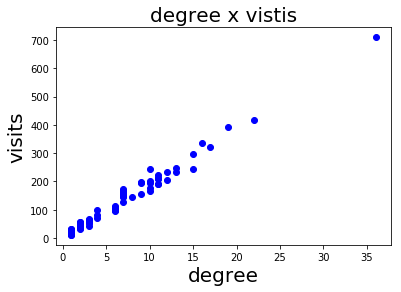

In [16]:
from collections import Counter
#setting a walk with 10000 length for a bunch of data
vis_time = Counter(random_walk(P, N, 10000))

degrees = []
visits = []
#getting the degrees from the adj matrix
#and the visits from the counter dictionary
for node in vis_time:
    degrees.append(np.sum(M[node]))
    visits.append(vis_time[node])

#ploting the graphic degree x visits
fig = plt.subplot(1,1,1)
plt.plot(degrees, visits,'bo')
plt.xlabel("degree", fontsize=20)
plt.ylabel("visits", fontsize=20)
plt.title("degree x vistis", fontsize=20)
plt.show(True)

Pode-se observar um comportamento linear do gráfico, resultado que confirma as expectativas anteriores.
Como possuímos um grafo não-direcionado e não-ponderado, espera-se que nós com maiores graus de conexão sejam visitados mais frequentemente.
Isto se da pois a probabilidade de visita é diretamente proporcional ao numero de conexões existentes no nó (para o caso proposto).
Agora vamos calcular o coeficiente de <i>Person</i> para checar a correlação entre o grau e o número de visitas.

In [17]:
from scipy.stats import pearsonr

print("pearson coeficient = %f" % pearsonr(degrees, visits)[0])

pearson coeficient = 0.990618


Pela análise do resultado, pode-se afirmar que grau e visitas do nó são altamente correlacionados.
Este fato corrobora com a ideia apresentada anteriormente, onde quanto maior o grau do nó maior a probabilidade dele ser visitado em uma caminhada aleatória não-ponderada e não-direcionada.

## Exercício 4:
### Realizando a análise de um grafo dado

Este exercício propõe algumas análises para um dado grafo.
O grafo proposto é dado por:

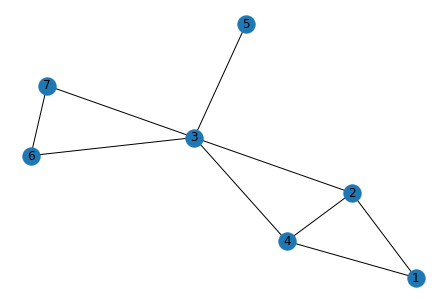

Nodes: [1, 2, 3, 4, 5, 6, 7]


In [18]:
nx.draw(G, with_labels=True)
plt.show(True)
print('Nodes:',G.nodes())

### a) Matrizes $P^n$ do grafo G

A primeira análise para o grafo dado será das matrizes de transição de ordem $n$.
É proposto para o exercício $n = \{1, 5, 10, 50, 100\}$. 
O resultado é apresentado abaixo.

In [19]:
from numpy.linalg import matrix_power

A = nx.adjacency_matrix(G)
N = G.number_of_nodes()
P = transition_prob_matrix(A, N)

n_seq = [1, 5, 10, 50, 100]
for n in n_seq:
    P_n = pd.DataFrame(matrix_power(P,n))
    P_n.columns = P_n.index = G.nodes()
    print("Matrix P^%d" % n)
    display(P_n)

Matrix P^1


,1,2,3,4,5,6,7
1,0.000000,0.500000,0.000000,0.500000,0.0,0.0,0.0
2,0.333333,0.000000,0.333333,0.333333,0.0,0.0,0.0
3,0.000000,0.200000,0.000000,0.200000,0.2,0.2,0.2
4,0.333333,0.333333,0.333333,0.000000,0.0,0.0,0.0
5,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
6,0.000000,0.000000,0.500000,0.000000,0.0,0.0,0.5
7,0.000000,0.000000,0.500000,0.000000,0.0,0.5,0.0


Matrix P^5


,1,2,3,4,5,6,7
1,0.116049,0.219506,0.193827,0.219506,0.065185,0.092963,0.092963
2,0.146337,0.167901,0.304486,0.172016,0.038765,0.085247,0.085247
3,0.077531,0.182691,0.213642,0.182691,0.078741,0.132352,0.132352
4,0.146337,0.172016,0.304486,0.167901,0.038765,0.085247,0.085247
5,0.130370,0.116296,0.393704,0.116296,0.028889,0.107222,0.107222
6,0.092963,0.127870,0.330880,0.127870,0.053611,0.117778,0.149028
7,0.092963,0.127870,0.330880,0.127870,0.053611,0.149028,0.117778


Matrix P^10


,1,2,3,4,5,6,7
1,0.118521,0.166853,0.284759,0.166853,0.051696,0.105658,0.105658
2,0.111236,0.171839,0.268590,0.171822,0.056952,0.109781,0.109781
3,0.113904,0.161154,0.290510,0.161154,0.052506,0.110386,0.110386
4,0.111236,0.171822,0.268590,0.171839,0.056952,0.109781,0.109781
5,0.103392,0.170855,0.262531,0.170855,0.060846,0.115760,0.115760
6,0.105658,0.164671,0.275965,0.164671,0.057880,0.116065,0.115088
7,0.105658,0.164671,0.275965,0.164671,0.057880,0.115088,0.116065


Matrix P^50


,1,2,3,4,5,6,7
1,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
2,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
3,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
4,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
5,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
6,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
7,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111


Matrix P^100


,1,2,3,4,5,6,7
1,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
2,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
3,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
4,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
5,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
6,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
7,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111


Pode-se ver que $P^n$ com $n \rightarrow \infty$ (análise de estacionariedade e perda de memória da rede), converge-se para uma matriz em que os elementos da coluna são diretamente proporcionais ao grau do nó, isto é, $p_i = \frac{k_i}{\sum_j^N k_j}$ com $i=1,2,..,N$. Pode-se verificar esta preposição realizando o calculo diretamente ao invés de se calcular a matriz $P^n$ como a seguir:

In [20]:
vk = dict(G.degree())
vk = list(vk.values())  # we get only the degree values
vk = np.array(vk)
sum_k = np.sum(vk)

x = []
#calculating the P^n value using the proposed formula
for node in G.nodes():
    x.append(G.degree(node)/sum_k)

#displaying the result
Pn_j = pd.DataFrame({'Pn_j': x})
Pn_j.index = G.nodes()
display(Pn_j)

,Pn_j
1,0.111111
2,0.166667
3,0.277778
4,0.166667
5,0.055556
6,0.111111
7,0.111111


### B) Calculando $A^3$ e a Matriz Distancia $D$ para a rede <i>Les Miserables</i> e apresentando o resultado por um Scatterplot e calculando a correlação de Pearson

Realizando todas as análises propostas, encontra-se os seguintes resultados:

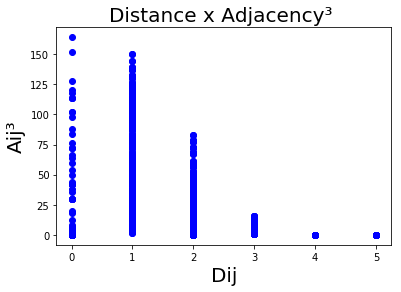

pearson coeficient = -0.615206


In [21]:
LesMisNet = nx.read_gml('Networks/lesmis.gml', label = 'id')
UW_UD_LesMisNet = to_unweight(LesMisNet, 1.0, 'value')
NetWork = UW_UD_LesMisNet

A = nx.adjacency_matrix(NetWork)
A3 = matrix_power(A.todense(),3)
D = dist_matrix(NetWork)

D = np.reshape(D,77*77)
A3 = np.reshape(A3, 77*77)

#ploting the graphic Distance x Adjacency³
fig = plt.subplot(1,1,1)
plt.plot(D, np.array(A3)[0],'bo')
plt.xlabel("Dij", fontsize=20)
plt.ylabel("Aij³", fontsize=20)
plt.title("Distance x Adjacency³ ", fontsize=20)
plt.show(True)


print("pearson coeficient = %f" % pearsonr(D, np.array(A3)[0])[0])

Analisando o gráfico e o coeficiente encontrado, pode-se inferir que com o aumento da distância tem-se uma diminuição da possibilidade de alcançar um nó $j$ partindo de $i$ com 3 passos.
Este fato é coerente à expectativa inicial pois, com valores de distância mínima maiores que 3, a possibilidade de se alcançar esses nós $j$ será zero.
Agora para valores de distância mínima menores ou iguais à 3, quanto menor este valor, maior será a possibilidade de se alcançar um nó $j$ por diversos caminhos. 

Ajustando o gráfico para visualização de "concentraçao de pontos" temos:

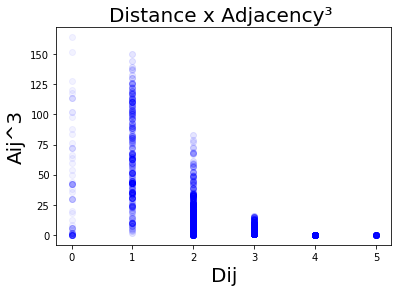

In [23]:
fig = plt.subplot(1,1,1)
plt.plot(D, np.array(A3)[0],'bo',alpha=0.05)
plt.xlabel("Dij", fontsize=20)
plt.ylabel("Aij^3", fontsize=20)
plt.title("Distance x Adjacency³ ", fontsize=20)
plt.show(True)

Percebe-se agora que há uma diferença de concentração entre os pontos $A_{i,j}^3$ distribuidos por $D_{i,j}$.
Ademais, percebe-se que a densidade de pontos (próximos a 0) cresce com o aumento da distância.
Isto se deve ao fato de com 3 passos na rede ($A^3$), tem-se que é impossível se alcançar estados com distância $\geq 3$.

### c) Calculando e apresentando um gráfico de Distância x Correlação

Agora, propõe-se a avaliação do comportamento da correlação com a variação da distância.
O resultado é apresentado pelo script abaixo.

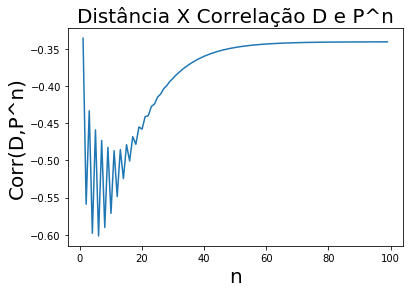

In [25]:
N = NetWork.number_of_nodes()
P = transition_prob_matrix(A, N)

cor = []
n_seq = range(1,100)
for n in n_seq:
    P_n = matrix_power(P,n)
    P_n = np.reshape(P_n, 77*77)
    cor.append(pearsonr(D, P_n)[0])

#ploting the graphic Distance X correlation between D and P^n
fig = plt.subplot(1,1,1)
plt.plot(n_seq, cor)
plt.xlabel("n", fontsize=20)
plt.ylabel("Pearson(D,P^n)", fontsize=20)
plt.title("Distância X Correlação D e P^n", fontsize=20)
plt.show(True)

Perceba que este gráfico demonstra que, de forma geral, a correlação da Distância e da Matriz de Probabilidade de ordem n possuem uma correlação negativa que tende a convergir para um valor maior (isto é, reduzindo a correlação negativa) principalmente ao fato de com longas caminhadas na rede constatar-se a propriedade de perca de memória, como em cadeias de Markov. 
Com isto, podemos dizer que para $n \rightarrow \infty$ o valor de $P^n_{i,j}$ dependerá apenas de $j$. Esta propriedade pode ser observada na questão 4a), onde com 100 iterações já temos a convergencia (como demonstra o gráfico).

Afim de demonstrar o comportamento inicial da rede, sugere-se aqui o estudo de um gráfico de valores pares e impares. O resultado obtido foi:

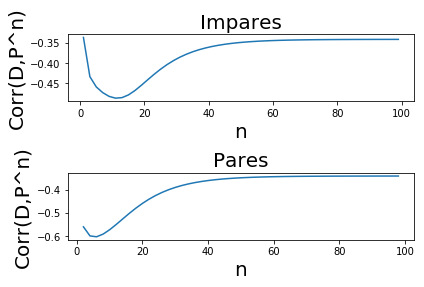

In [51]:
N = NetWork.number_of_nodes()
P = transition_prob_matrix(A, N)

cor_even, cor_odd = [], []
n_even = range(2,100,2)
n_odd  = range(1,100,2)

for n in n_odd:
    P_odd = matrix_power(P,n)
    P_odd = np.reshape(P_odd, 77*77)
    cor_odd.append(pearsonr(D, P_odd)[0])
    
for n in n_even:
    P_even = matrix_power(P,n)
    P_even = np.reshape(P_even, 77*77)
    cor_even.append(pearsonr(D, P_even)[0])

#ploting the graphic Distance X correlation between D and P^n
fig, ax = plt.subplots(2,1,frameon=True)
ax[0].plot(n_odd, cor_odd)
ax[0].set_xlabel("n", fontsize=20)
ax[0].set_ylabel("Corr(D,P^n)", fontsize=20)
ax[0].set_title("Impares", fontsize=20)

ax[1].plot(n_even, cor_even)
ax[1].set_xlabel("n", fontsize=20)
ax[1].set_ylabel("Corr(D,P^n)", fontsize=20)
ax[1].set_title("Pares", fontsize=20)
plt.tight_layout()

O comportamento aparentemente ruidoso no inicio da série dá se pelo fato de que números impares definem caminhos diferentes do que para números pares de tamanho da caminhada. Por exemplo: assuma que voce está no estado $i$ e deseja encontrar caminhos que levam a você mesmo, isto é, caminhos de $i$ para $i$. Caminhos de tanhos pares facilmente permitem a conclusão deste objetivo, já caminhos de tamanhos ímpares nem sempre permitem o retorno. 

### Exercício 6:
Esse exercício propõem a análise da distribuição de graus nas redes dadas:
<ul>
    <li>E-road network</li>
    <li>Facebook user-user friendships</li>
    <li> A coauthorship network among scientists working on network science, from 2006.</li>
    <li>Hamsterster friendships</li>
</ul>

In [52]:
import matplotlib.pyplot as plt
#ploting a histogram of the degree distribution
def plot_degree_dist(G):
    kv, P_k = degree_distribution(G)
    plt.plot(kv,P_k,'bo')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("k", fontsize=20)
    plt.ylabel("P(k)", fontsize=20)
    plt.title("Degree distribution", fontsize=20)
    plt.grid(True)
    plt.show(True)
    

def cum_degree_distribution(G):
    kv, P_k = degree_distribution(G)
    maxk = np.max(kv)
    cum_P_k = np.zeros(maxk+1)
    
    #calculating first element 
    cum_P_k[0] = P_k[0] 
    #calculating cumulatives
    for i in range(1, maxk+1):
        cum_P_k[i] = cum_P_k[i-1] + P_k[i]
    
    
    return kv, cum_P_k
    
def plot_cum_degree_dist(G):
    kv, cum_P_k = cum_degree_distribution(G)
    plt.plot(kv, cum_P_k,'bo')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("k", fontsize=20)
    plt.ylabel("Cum(P(k))", fontsize=20)
    plt.title("Cumulative Degree distribution", fontsize=20)
    plt.grid(True)
    plt.show(True)


### a) E-road network

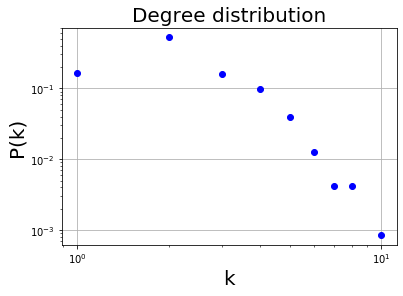

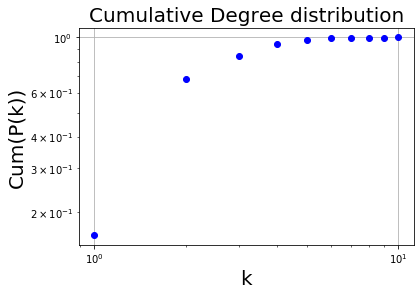

In [6]:
import networkx as nx

EuroRoad = nx.read_edgelist('Networks/subelj_euroroad/out.subelj_euroroad_euroroad', comments='%')
plot_degree_dist(EuroRoad)
plot_cum_degree_dist(EuroRoad)

### b) Facebook user-user friendships

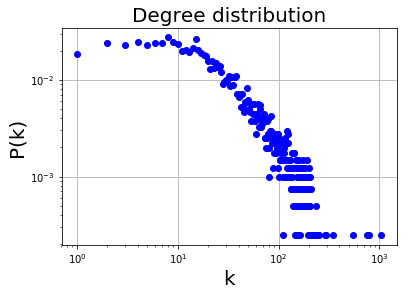

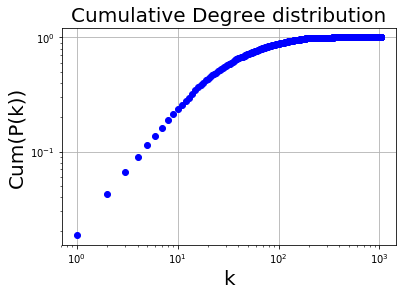

In [70]:
facebook = nx.read_edgelist('Networks/facebook_combined.txt', comments='%')
plot_degree_dist(facebook)
plot_cum_degree_dist(facebook)

### c) A coauthorship network among scientists working on network science, from 2006.

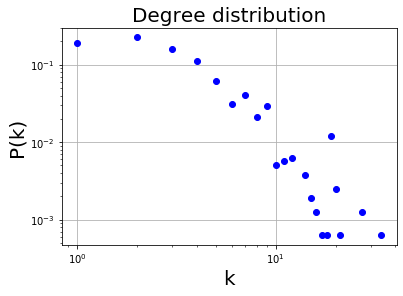

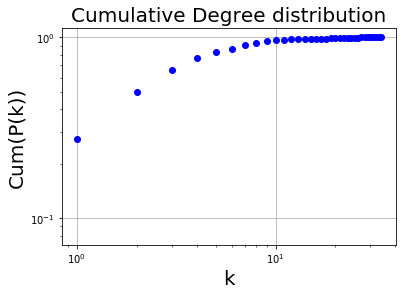

In [8]:
netscience = nx.read_gml("Networks/netscience.gml")
plot_degree_dist(netscience)
plot_cum_degree_dist(netscience)

### d) Hamsterster friendships

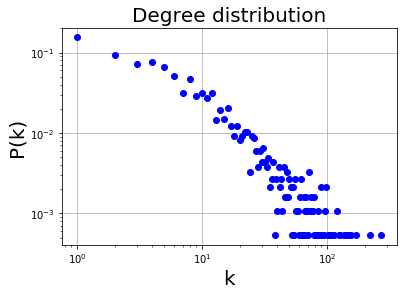

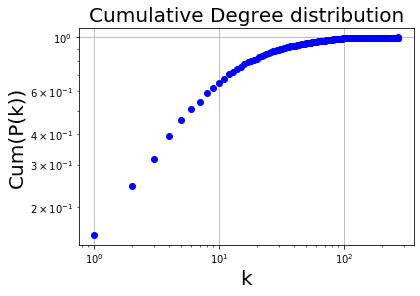

In [9]:
Hamsterster = nx.read_edgelist('Networks/petster-friendships-hamster/out.petster-friendships-hamster-uniq', comments='%')
plot_degree_dist(Hamsterster)
plot_cum_degree_dist(Hamsterster)

Pode-se observar que todas as redes provavelmente são <i>scale-free</i>, pois todas apresentam uma f(x) e F(x) muito similar as da distribuição exponencial, que pode ser observada a seguir:

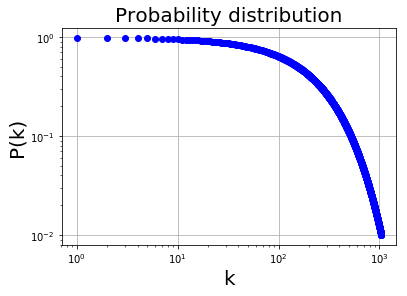

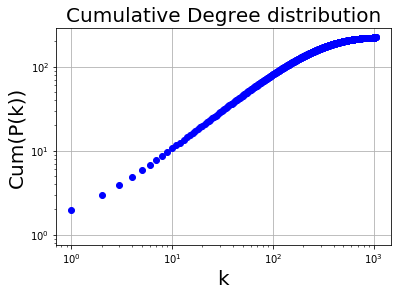

In [81]:
from scipy.stats import expon
x = np.linspace(expon.ppf(0.01),expon.ppf(0.99), 1046)
exp = (expon()).pdf(x)
exp_cum = exp.cumsum()

plt.plot(exp,'bo')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Probability distribution", fontsize=20)
plt.grid(True)
plt.show(True)

plt.plot(exp_cum,'bo')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k", fontsize=20)
plt.ylabel("Cum(P(k))", fontsize=20)
plt.title("Cumulative Degree distribution", fontsize=20)
plt.grid(True)
plt.show(True)

Visualmente, tem-se um comportamento semelhante entre a distribuição exponencial e as distribuições encontradas a cima.
Para se encontrar a exponencial que melhor representa estes dados, recomenda-se um estudo de valores de taxas (parâmetro da distribuição exponencial) para melhor se aproximar os valores.

## Exercício 8

Este exercício propõem a análise da distribuição dos caminhos mínimos das redes dadas do exercício anterior.

In [10]:
def shortest_path_distribution(G):
    # we get only the degree values
    D = dist_matrix(G)
    sp = D.flatten()
    maxd = np.max(sp)
    mind = np.min(sp)
    dvalues= range(0,maxd+1) # possible values of k
    Psp = np.zeros(maxd+1) # P(k)
    for d in sp:
        Psp[d] = Psp[d] + 1
    Psp = Psp/sum(Psp) # the sum of the elements of P(k) must to be equal to one
    return dvalues,Psp

def plot_short_path_dist(G):
    dv, Psp = shortest_path_distribution(G)
    plt.plot(dv,Psp,'bo')
    plt.xlabel("shortest path", fontsize=20)
    plt.ylabel("P(shortest path)", fontsize=20)
    plt.title("Shortest path distribution", fontsize=20)
    plt.grid(True)
    plt.show(True)

### a) E-road network

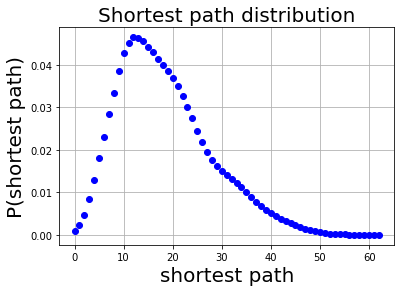

In [21]:
#obtaining the giant component from this network
EuroRoad = max(nx.connected_component_subgraphs(EuroRoad), key=len)
plot_short_path_dist(EuroRoad)

### b) Facebook user-user friendships
##### Usando uma sub-rede do facebook menor para o exercício:

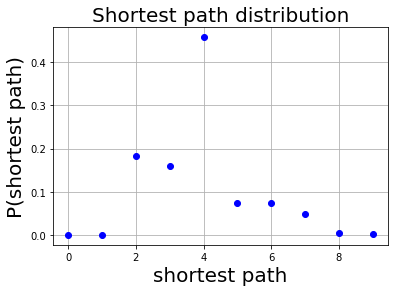

In [20]:
facebook = nx.read_edgelist('Networks/out.ego-facebook', comments = "%")
#obtaining the giant component from this network
facebook = max(nx.connected_component_subgraphs(facebook), key=len)

plot_short_path_dist(facebook)

### c) Network science

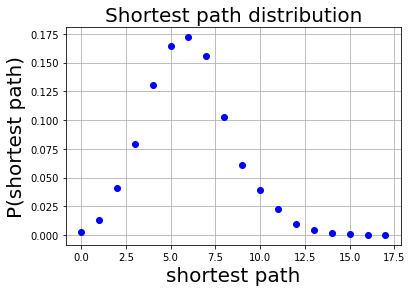

In [22]:
#obtaining the giant component from this network
netscience = max(nx.connected_component_subgraphs(netscience), key=len)
plot_short_path_dist(netscience)

### d) Hamsterster friendships

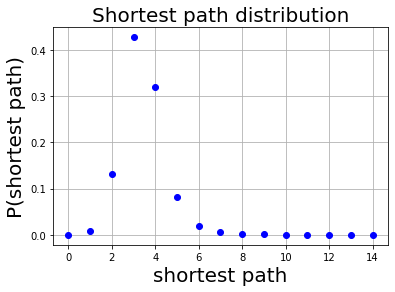

In [23]:
#obtaining the giant component from this network
Hamsterster = max(nx.connected_component_subgraphs(Hamsterster), key=len)
plot_short_path_dist(Hamsterster)

Pode-se notar que, pela distribuição de probabilidade dos menores caminhos, tem-se uma maior probabilidade para caminhos que possuem distâncias próximas ao primeiro quartil da amostra de distâncias.
Esta propriedade da distribuição demonstra uma boa conectividade da rede, uma vez que com caminhos menores é possível se alcançar diversos nós.

## Exercício 7 e 9:

Este exercício propõe a análise das métricas das redes dadas. 
Foram agrupados os exercícios 7 e 9, pois ambos propõe esta ideia.

Para está análise, será criada uma tabela de métricas por rede dada.
As redes analisadas são:
<ul>
    <li>E-road network</li>
    <li>Facebook user-user friendships</li>
    <li> A coauthorship network among scientists working on network science, from 2006.</li>
    <li>Hamsterster friendships</li>
</ul>


In [24]:
import pandas as pd

def average_short_path(G):
    N = G.number_of_nodes()
    D = dist_matrix(G)
    return np.sum(D)/(N*(N-1))

def network_metrics_tables(NetWorks):
    table = {"N":[],
             "<k>":[],
             "<k²>":[],
             "<CC>":[],
             "Transitivity":[],
             "<k²>/<k>":[],
             "H":[],
             "Average shortest path":[],
             "diameter":[]}
        
    for network in NetWorks:
        G = NetWorks[network]
        
        #calculanting alfa 
        k2 = momment_of_degree_distribution(G,2)
        k = momment_of_degree_distribution(G,1)
        
        #populating table with every network metrics
        table["N"].append(G.number_of_nodes())
        table["<k>"].append(k)
        table["<k²>"].append(k2)
        table["<CC>"].append(np.average(local_clust(G)))                    
        table["Transitivity"].append(global_clust(G))
        table["<k²>/<k>"].append(k2/k)
        table["H"].append(shannon_entropy(G))
        table["Average shortest path"].append(average_short_path(G))
        table["diameter"].append(nx.diameter(G))
        
    table_df = pd.DataFrame(table, index = NetWorks.keys())
    display(table_df)

In [25]:
NetWorks = {"E-road": EuroRoad,
            "Facebook": facebook,
            "netscience": netscience,
            "Hamsterster": Hamsterster}

network_metrics_tables(NetWorks)

,N,<k>,<k²>,<CC>,Transitivity,<k²>/<k>,H,Average shortest path,diameter
E-road,1039,2.512031,7.753609,0.018906,0.035255,3.086590,2.003676,18.395146,62
Facebook,2888,2.064404,528.131579,0.027247,0.000359,255.827575,0.254405,3.867421,9
netscience,379,4.823219,38.686016,0.741231,0.430575,8.020788,3.347795,6.041867,17
Hamsterster,1788,13.955257,635.606264,0.143305,0.090369,45.546008,4.967908,3.452640,14


Conclusão 7 e 9

## Exercício 10:

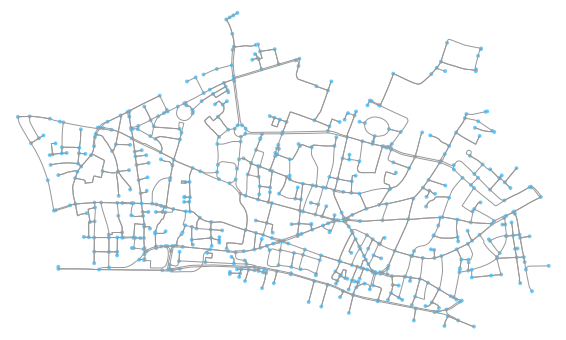

(<Figure size 1175.19x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c9bcaf048>)

In [2]:
import osmnx as ox

LondonGeocode = "City of London, England"
LondonNetwork = ox.graph_from_place(LondonGeocode, network_type="drive", which_result = 2)
ox.plot_graph(LondonNetwork)

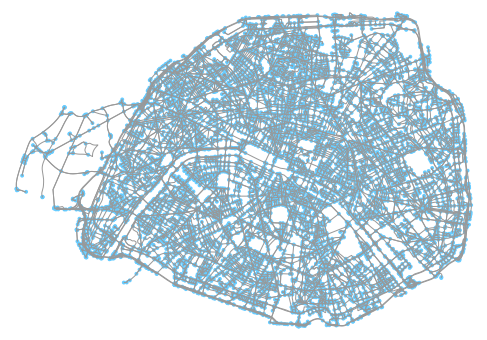

In [34]:
ParisGeocode = "Paris, France"

ParisNetwork = ox.graph_from_place(ParisGeocode, network_type="drive") 
ox.plot_graph(ParisNetwork)

ParisNetwork = nx.Graph(ParisNetwork)

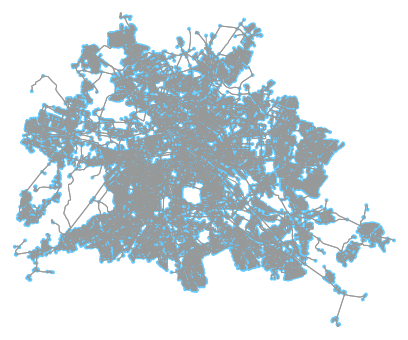

In [33]:
BerlinGeocode = "Berlin,Germany"

BerlinNetwork = ox.graph_from_place(BerlinGeocode, network_type="drive", which_result=2) 
ox.plot_graph(BerlinNetwork)

BerlinNetwork = nx.Graph(BerlinNetwork)

In [44]:
import pandas as pd


def city_metrics_tables(Cities):
    table = {"N":[],
             "<CC>":[],
             "Transitivity":[],
             "<k²>/<k>":[],
             "H":[],
             "Average shortest path":[]}
        
    for city in Cities:
        G = Cities[city]
        
        #calculanting alfa 
        k2 = momment_of_degree_distribution(G,2)
        k = momment_of_degree_distribution(G,1)
        
        #populating table with every network metrics
        table["N"].append(G.number_of_nodes())
        table["<CC>"].append(np.average(local_clust(G)))                    
        table["Transitivity"].append(global_clust(G))
        table["<k²>/<k>"].append(k2/k)
        table["H"].append(shannon_entropy(G))
        table["Average shortest path"].append(nx.average_shortest_path_length(G))
        
    table_df = pd.DataFrame(table, index = Cities.keys())
    display(table_df)

In [45]:
Cities = {LondonGeocode: LondonNetwork,
          BerlinGeocode: BerlinNetwork,
          ParisGeocode: ParisNetwork}

city_metrics_tables(Cities)

,N,<CC>,Transitivity,<k²>/<k>,H,Average shortest path
"City of London, England",692,0.054913,0.080597,2.901584,1.675027,16.909731
"Berlin,Germany",27874,0.051685,0.057846,3.258524,1.496865,67.737630
"Paris, France",10106,0.067845,0.071604,3.325746,1.396748,39.815716


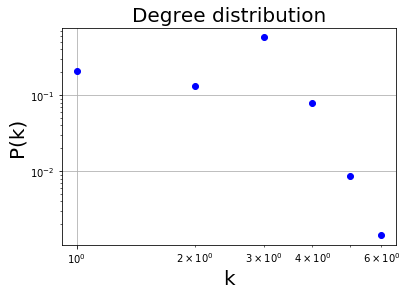

In [48]:
plot_degree_dist(LondonNetwork)

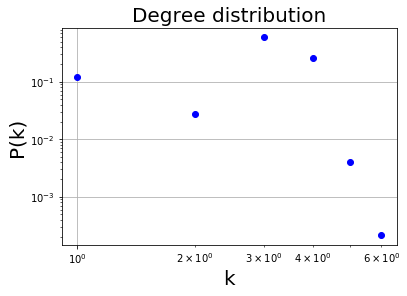

In [49]:
plot_degree_dist(BerlinNetwork)

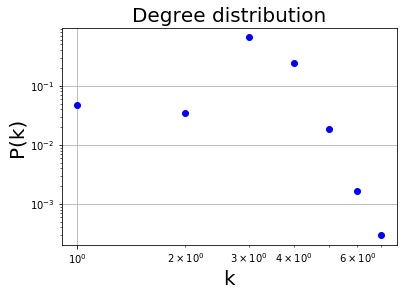

In [50]:
plot_degree_dist(ParisNetwork)